In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler


In [30]:
# Load the Iris dataset
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


C:\Users\safam\AppData\Local\Temp\ipykernel_9852\4044814837.py:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(


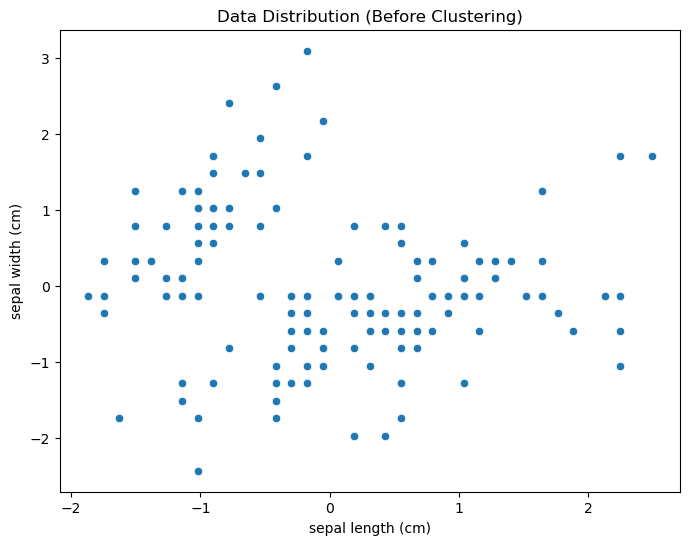

In [54]:
# Visualize the data using the first two features before clustering
plt.figure(figsize=(8, 6))
sns.scatterplot(
    x=scaled_data[:, 0], 
    y=scaled_data[:, 1], 
    palette="viridis"
)
plt.title("Data Distribution (Before Clustering)")

plt.xlabel(data.feature_names[0])  # Feature 1 name
plt.ylabel(data.feature_names[1])  # Feature 2 name
plt.show()


An **elbow plot** helps determine the optimal number of clusters (k) for K-Means clustering by plotting the within-cluster sum of squares (WCSS) against the number of clusters. 

In [56]:
wcss = []
k_values = range(1, 11)  # Try cluster numbers from 1 to 10
for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)  # Sum of squared distances to the nearest cluster center


C:\Users\safam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\safam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\safam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\safam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

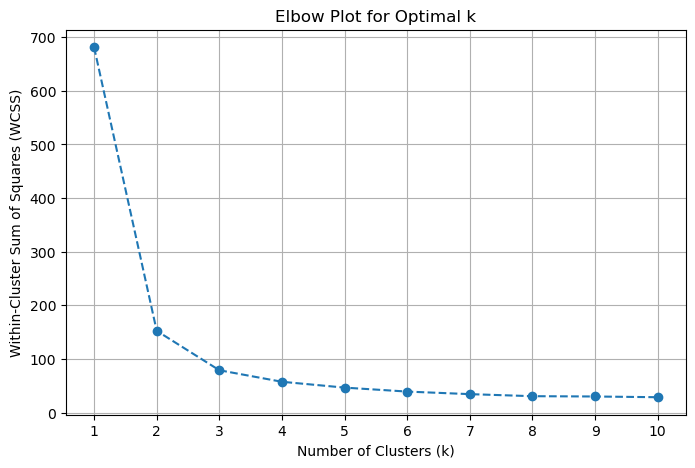

In [57]:
# Plot the elbow graph
plt.figure(figsize=(8, 5))
plt.plot(k_values, wcss, marker='o', linestyle='--')
plt.title('Elbow Plot for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(k_values)
plt.grid()

The "elbow point" is where the within-cluster sum of squares (WCSS) decreases significantly and then starts to level off.
Between k=1 and k=3, the WCSS decreases rapidly. This indicates that adding clusters significantly improves the compactness of the clusters.
The "elbow point" is at k=3, which suggests that dividing the data into 3 clusters is optimal for this dataset.

## KMeans Clustering 

Description of KMeans Clustering: KMeans clustering partitions data into 𝐾 clusters by:

    Randomly initializing 𝐾 cluster centroids.
    Assigning each data point to the nearest centroid.
    Updating centroids by calculating the mean position of all points in each cluster.
    Iterating steps 2 and 3 until centroids stabilize or a maximum number of iterations is reached.

Why KMeans is Suitable for the Iris Dataset:

    Iris has numerical features, making it compatible with the Euclidean distance used in KMeans.
    The dataset is small and well-separated, ideal for KMeans, which works best with distinct clusters.

In [26]:
#Preprocess the data (scaling to normalize feature values)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

# Convert back to a DataFrame for easier visualization
scaled_data_df = pd.DataFrame(scaled_data, columns=data.feature_names)

#Apply KMeans clustering
km = KMeans(n_clusters=3, random_state=42)
y_pred = km.fit_predict(scaled_data) #y_pred= cluster labels
y_pred

C:\Users\safam\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 2, 2, 2, 1, 1, 1, 1, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 2, 1, 1, 2, 2, 1,
       1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [27]:
# Add cluster labels to the dataset for visualization
scaled_data_df['Km_Cluster'] = y_pred
scaled_data_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Km_Cluster
0,-0.900681,1.019004,-1.340227,-1.315444,1
1,-1.143017,-0.131979,-1.340227,-1.315444,2
2,-1.385353,0.328414,-1.397064,-1.315444,2
3,-1.506521,0.098217,-1.283389,-1.315444,2
4,-1.021849,1.249201,-1.340227,-1.315444,1
...,...,...,...,...,...
145,1.038005,-0.131979,0.819596,1.448832,0
146,0.553333,-1.282963,0.705921,0.922303,0
147,0.795669,-0.131979,0.819596,1.053935,0
148,0.432165,0.788808,0.933271,1.448832,0


In [31]:
centroids=km.cluster_centers_
centroids

array([[ 0.57100359, -0.37176778,  0.69111943,  0.66315198],
       [-0.81623084,  1.31895771, -1.28683379, -1.2197118 ],
       [-1.32765367, -0.373138  , -1.13723572, -1.11486192]])

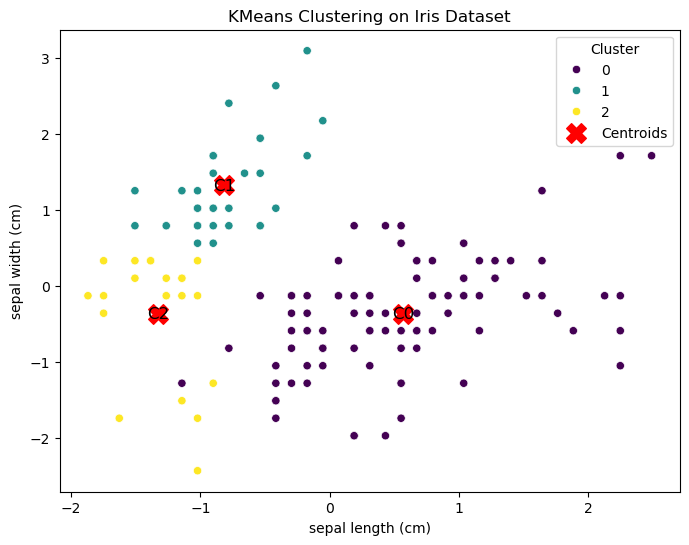

In [32]:
# Visualization of the clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=scaled_data_df.iloc[:, 0], y=scaled_data_df.iloc[:, 1], hue=y_pred, palette="viridis")

# Plot centroids
plt.scatter(centroids[:, 0], centroids[:, 1], s=200, c='red', marker='X', label='Centroids')

# Annotate centroids
for i, (x, y) in enumerate(centroids[:, :2]):  # Iterate through centroid coordinates
    plt.text(x, y, f'C{i}', color='black', fontsize=12, ha='center', va='center')
    
plt.title("KMeans Clustering on Iris Dataset")
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])
plt.legend(title="Cluster")
plt.show()

Notes:

Steps to Label Centroids
Extract Centroids:
The centroids can be accessed using kmeans.cluster_centers_. These are the center points of the clusters in the scaled feature space.

Plot Centroids:
Use plt.scatter() to add the centroids to the plot as larger markers.

centroids[:, 0] and centroids[:, 1]: x and y coordinates of the centroids in the first two dimensions.
s=200: Size of the centroid markers.
c='red': Color of the centroids.
marker='X': Style of the centroid markers.

Annotate Centroids:
Use plt.text() to label the centroids with their cluster numbers.
x, y: Coordinates of each centroid.
f'C{i}': Text label for the centroid, where i is the cluster number.
ha='center', va='center': Ensures the text is centered at the marker.


## Hierarchical Clustering

Description of Hierarchical Clustering: Hierarchical clustering builds a tree-like structure (dendrogram) by:

    Starting with each data point as its own cluster.
    Merging the closest clusters iteratively based on distance (e.g., Euclidean, Manhattan).
    Stopping when the desired number of clusters is reached.

Two types:

    Agglomerative (bottom-up): Clusters are merged iteratively.
    Divisive (top-down): A single cluster is divided iteratively.

Why Hierarchical Clustering is Suitable for the Iris Dataset:

    Provides insights into the hierarchical relationships between samples.
    Suitable for small datasets like Iris due to computational efficiency.

In [36]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


**Clustering:**
No clustering is done or labels are assigned to data points. Only visualizes the dendrogram. Does not specify the number of clusters. It shows the full hierarchical structure.

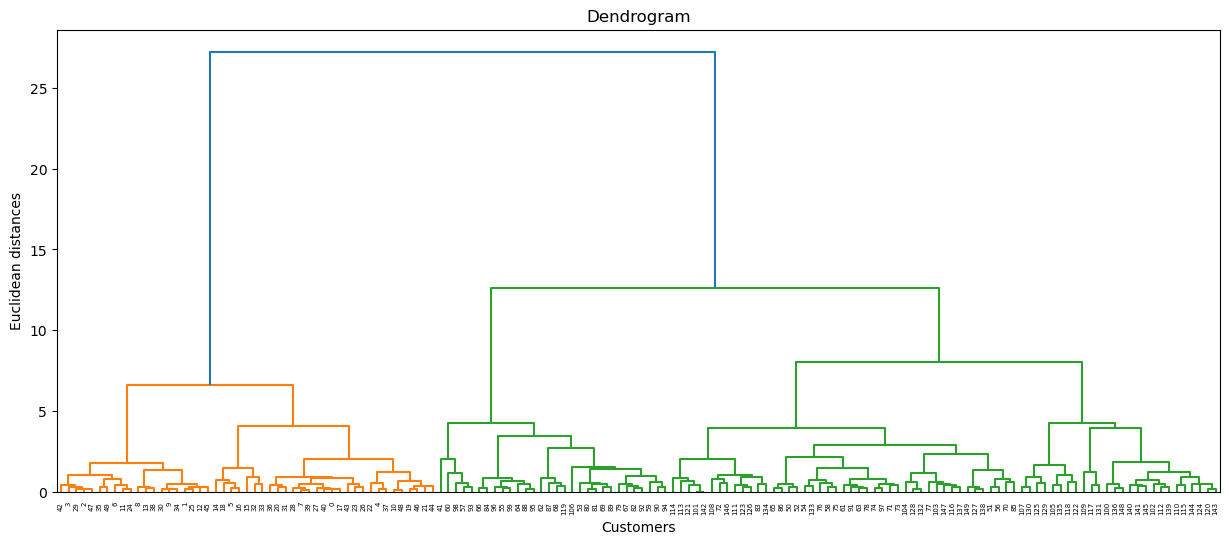

In [43]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,6))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
#plt.grid(True)
dendrogram = sch.dendrogram(sch.linkage(scaled_data, method = 'ward'))
plt.show()

**Agglomerative Clustering:**

* Performs hierarchical clustering using AgglomerativeClustering with a specified number of clusters (n_clusters=3) and assigns labels to the data points (hierarchical_labels).
* After performing clustering, it visualizes the dendrogram again, showing how clusters would be formed hierarchically based on the dataset.
* Specifies n_clusters=3, meaning the dendrogram will be used as a guide to determine where to cut the tree to get exactly 3 clusters.

In [45]:
# Apply Hierarchical Clustering
hierarchical = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
hierarchical_labels = hierarchical.fit_predict(scaled_data)

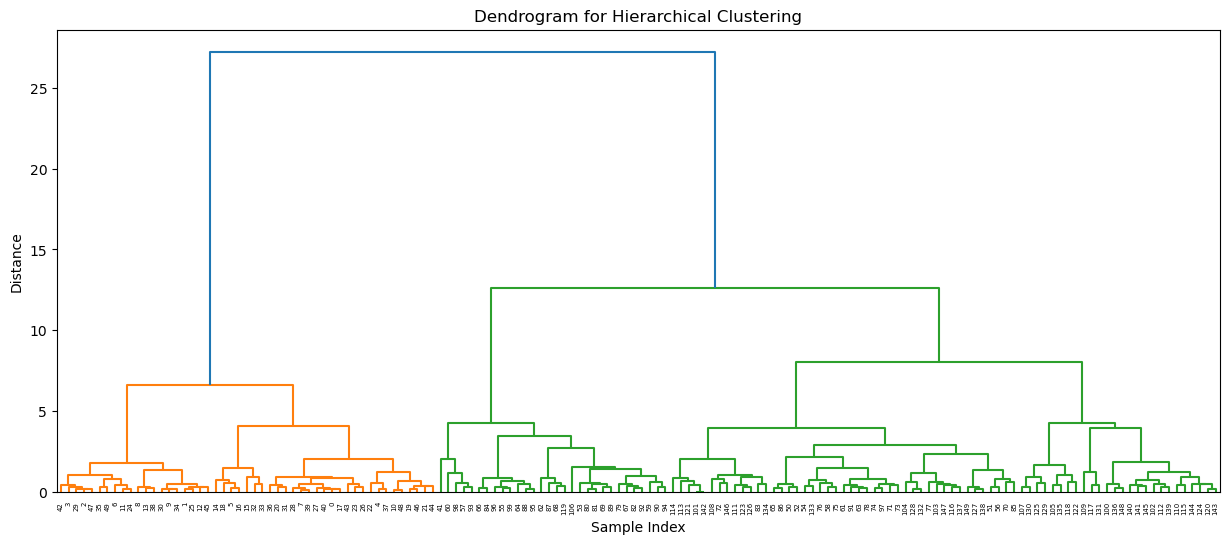

In [48]:
# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(15, 6))
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix)
plt.title("Dendrogram for Hierarchical Clustering")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.show()

### Optimal number of clusters

Often, the optimal number of clusters can be found from a Dendogram is a simple manner.
* Look for the longest stretch of vertical line which is not crossed by any ***extended*** horizontal lines (here *extended* means horizontal lines i.e. the cluster dividers are extended infinitely to both directions).
* Now take any point on that stretch of line and draw an imaginary horizontal line.
* Count how many vertical lines this imaginary lines crossed.
* That is likely to be the optimal number of clusters.

**The idea is shown in the following figure. Here the optimal number of clusters could be 4.**

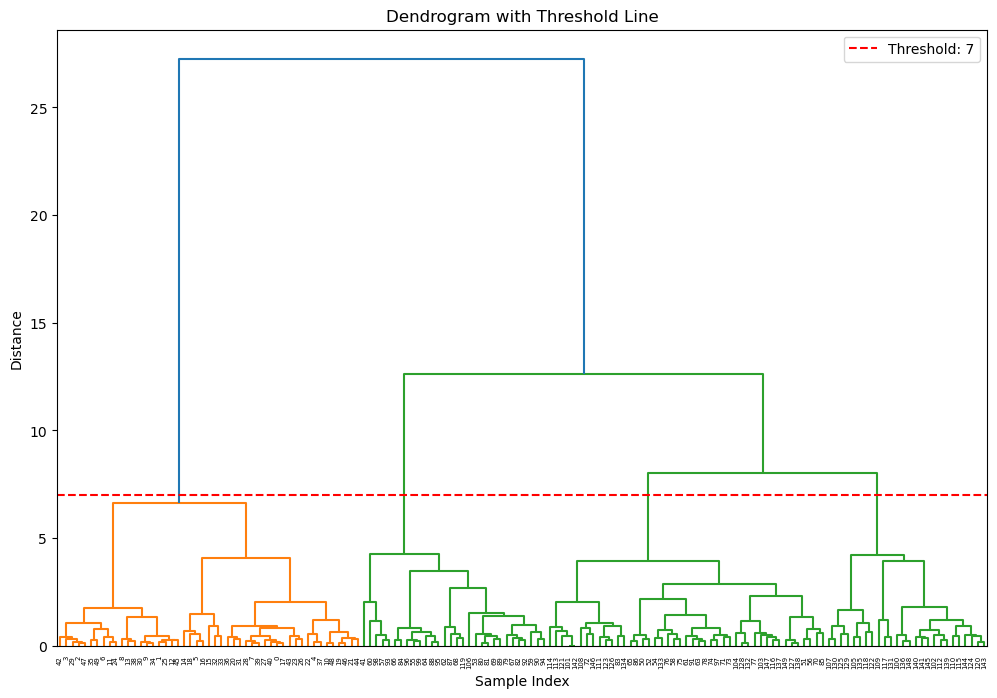

In [47]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# Dendrogram for Hierarchical Clustering
plt.figure(figsize=(12, 8))
linkage_matrix = linkage(scaled_data, method='ward')
dendrogram(linkage_matrix, truncate_mode=None, color_threshold=None)

# Add a horizontal line at a specific threshold
threshold = 7  # Adjust this value based on the dendrogram structure
plt.axhline(y=threshold, color='r', linestyle='--', label=f'Threshold: {threshold}')
plt.title("Dendrogram with Threshold Line")
plt.xlabel("Sample Index")
plt.ylabel("Distance")
plt.legend()
plt.show()


**Explanation of the Horizontal Line**

**Purpose of the Horizontal Line:**
* The horizontal line helps determine where to "cut" the dendrogram to decide on the number of clusters.
* The height of this line (distance value) represents the dissimilarity threshold. Clusters below this line are considered individual clusters.

**How to Count Vertical Lines:**
* Observe where the red horizontal line crosses vertical lines in the dendrogram.
* Each vertical line it crosses corresponds to a separate cluster.

**Why Count Vertical Lines?**
* Each vertical line crossed by the horizontal line represents a group of samples that remain unmerged above the threshold.
* These groups form distinct clusters.